# Correlations

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [3]:
import sys
sys.path.append('../../src/')
from utils.database import dbutils

conn = dbutils.connect()
cursor = conn.cursor()

In [3]:
nodes = pd.read_sql('select * from optourism.firenze_card_locations', con=conn)

In [4]:
df = pd.read_sql('select * from optourism.firenze_card_logs', con=conn)
df['museum_id'].replace(to_replace=39,value=38,inplace=True)
df['short_name'] = df['museum_id'].replace(dict(zip(nodes['museum_id'],nodes['short_name'])))
df['string'] = df['museum_id'].replace(dict(zip(nodes['museum_id'],nodes['string'])))
df['date'] = pd.to_datetime(df['entry_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['hour'] = pd.to_datetime(df['date']) + pd.to_timedelta(pd.to_datetime(df['entry_time'], format='%Y-%m-%d %H:%M:%S').dt.hour, unit='h')
df['hour_of_day'] = pd.to_datetime(df['entry_time'], format='%Y-%m-%d %H:%M:%S').dt.hour
df['day_of_week'] = pd.to_datetime(df['entry_time'], format='%Y-%m-%d %H:%M:%S').dt.dayofweek
df['total_people'] = df['total_adults'] + df['minors']

Sample workflow. Function defined below.

In [5]:
df1 = df.groupby(['short_name','date']).sum()['total_people'].to_frame()
df1.reset_index(inplace=True)
df1.head()

,short_name,date,total_people
0,Accademia,2016-06-01,330
1,Accademia,2016-06-02,484
2,Accademia,2016-06-03,463
3,Accademia,2016-06-04,511
4,Accademia,2016-06-07,423


In [6]:
df2 = df1.pivot(index='date',columns='short_name',values='total_people')
df2.head()

short_name,Accademia,Brancacci,Cappelle Medicee,Casa Buonarroti,La Specola,Laurenziana,M. Antropologia,M. Archeologico,M. Bargello,M. Calcio,...,Palazzo Medici,Palazzo Strozzi,Pitti,Planetario,Primo Conti,San Lorenzo,Santa Croce,Torre di Palazzo Vecchio,Uffizi,V. Bardini
date,,,,,,,,,,,,,,,,,,,,,
2016-06-01,330.0,51.0,143.0,20.0,7.0,65.0,NaN,17.0,133.0,NaN,...,NaN,55.0,256.0,1.0,NaN,126.0,166.0,64.0,423.0,26.0
2016-06-02,484.0,59.0,233.0,17.0,2.0,NaN,1.0,45.0,143.0,NaN,...,173.0,133.0,239.0,NaN,NaN,241.0,174.0,57.0,490.0,19.0
2016-06-03,463.0,21.0,280.0,26.0,11.0,145.0,6.0,24.0,163.0,NaN,...,133.0,94.0,361.0,NaN,NaN,281.0,313.0,159.0,500.0,27.0
2016-06-04,511.0,83.0,198.0,21.0,12.0,NaN,18.0,17.0,171.0,NaN,...,131.0,68.0,431.0,11.0,NaN,200.0,229.0,160.0,444.0,27.0
2016-06-05,NaN,NaN,NaN,16.0,3.0,NaN,6.0,NaN,NaN,NaN,...,59.0,45.0,NaN,1.0,NaN,42.0,168.0,77.0,NaN,20.0


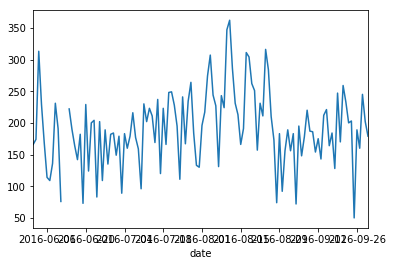

In [7]:
df2['Santa Croce'].plot()

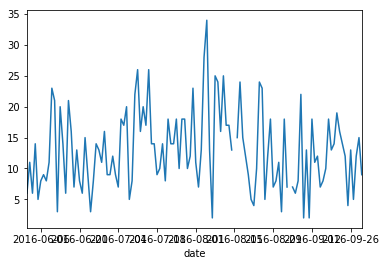

In [8]:
df2['M. Ferragamo'].plot()

In [29]:
M = df2.corr(method='kendall')
M.head()

short_name,Accademia,Brancacci,Cappelle Medicee,Casa Buonarroti,La Specola,Laurenziana,M. Antropologia,M. Archeologico,M. Bargello,M. Calcio,...,Palazzo Medici,Palazzo Strozzi,Pitti,Planetario,Primo Conti,San Lorenzo,Santa Croce,Torre di Palazzo Vecchio,Uffizi,V. Bardini
short_name,,,,,,,,,,,,,,,,,,,,,
Accademia,1.000000,0.047619,0.666667,0.000000,0.142857,0.600000,0.142857,0.575758,0.692308,0.000000,...,0.490909,0.351155,0.490909,0.390360,NaN,0.571429,0.418182,-0.060606,0.743590,0.054545
Brancacci,0.047619,1.000000,-0.047619,0.428571,0.047619,-0.333333,0.238095,-0.142857,0.333333,-1.000000,...,-0.333333,0.195180,0.428571,0.276026,NaN,0.047619,-0.142857,-0.333333,0.333333,0.047619
Cappelle Medicee,0.666667,-0.047619,1.000000,0.285714,0.071429,0.800000,0.357143,0.672727,0.787879,0.816497,...,0.454545,-0.224733,0.381818,0.390360,NaN,0.785714,0.345455,-0.018182,0.606061,-0.054545
Casa Buonarroti,0.000000,0.428571,0.285714,1.000000,0.428571,0.600000,0.809524,0.285714,0.714286,1.000000,...,0.285714,0.000000,0.571429,-0.292770,NaN,0.047619,0.428571,0.428571,-0.071429,0.428571
La Specola,0.142857,0.047619,0.071429,0.428571,1.000000,0.000000,0.428571,0.000000,0.357143,0.816497,...,0.000000,-0.254588,0.428571,-0.690066,NaN,0.000000,0.714286,-0.071429,0.071429,0.285714


In [30]:
# For dropna(), how="any" is too liberal, but how="all" fails to do anything because the diagonal is always 1. 
# Solution: Convert diagonal to NAs, dropna(how="all"), then convert diagonal back to 1.
M.values[[np.arange(M.shape[0])]*2] = np.nan # This sets diagonal to NA
M.dropna(axis=0,how='all',inplace=True) 
M.dropna(axis=1,how='all',inplace=True) 
M.values[[np.arange(M.shape[0])]*2] = 1
M.fillna(0,inplace=True) # Replace all remaining NAs with 0
M.head()

short_name,Accademia,Brancacci,Cappelle Medicee,Casa Buonarroti,La Specola,Laurenziana,M. Antropologia,M. Archeologico,M. Bargello,M. Calcio,...,Orto Botanico,Palazzo Medici,Palazzo Strozzi,Pitti,Planetario,San Lorenzo,Santa Croce,Torre di Palazzo Vecchio,Uffizi,V. Bardini
short_name,,,,,,,,,,,,,,,,,,,,,
Accademia,1.000000,0.047619,0.666667,0.000000,0.142857,0.600000,0.142857,0.575758,0.692308,0.000000,...,0.055556,0.490909,0.351155,0.490909,0.390360,0.571429,0.418182,-0.060606,0.743590,0.054545
Brancacci,0.047619,1.000000,-0.047619,0.428571,0.047619,-0.333333,0.238095,-0.142857,0.333333,-1.000000,...,-0.238095,-0.333333,0.195180,0.428571,0.276026,0.047619,-0.142857,-0.333333,0.333333,0.047619
Cappelle Medicee,0.666667,-0.047619,1.000000,0.285714,0.071429,0.800000,0.357143,0.672727,0.787879,0.816497,...,0.111111,0.454545,-0.224733,0.381818,0.390360,0.785714,0.345455,-0.018182,0.606061,-0.054545
Casa Buonarroti,0.000000,0.428571,0.285714,1.000000,0.428571,0.600000,0.809524,0.285714,0.714286,1.000000,...,0.333333,0.285714,0.000000,0.571429,-0.292770,0.047619,0.428571,0.428571,-0.071429,0.428571
La Specola,0.142857,0.047619,0.071429,0.428571,1.000000,0.000000,0.428571,0.000000,0.357143,0.816497,...,0.357143,0.000000,-0.254588,0.428571,-0.690066,0.000000,0.714286,-0.071429,0.071429,0.285714


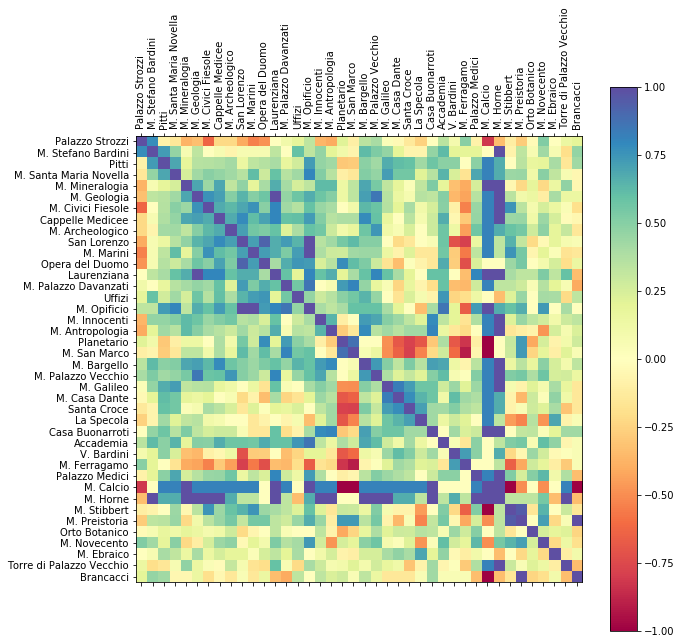

In [54]:
fig = plt.figure(figsize=(10,10))#,dpi=300)
ax = fig.add_subplot(111)
cmap=plt.cm.Spectral

cax = ax.matshow(M,cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+M.index.tolist(),rotation=90)
ax.set_yticklabels(['']+M.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

Say we want to order these rows/columns to see patterns. Use `linkage()` and `dendogram()` from `scipi.cluster.hierachy`.

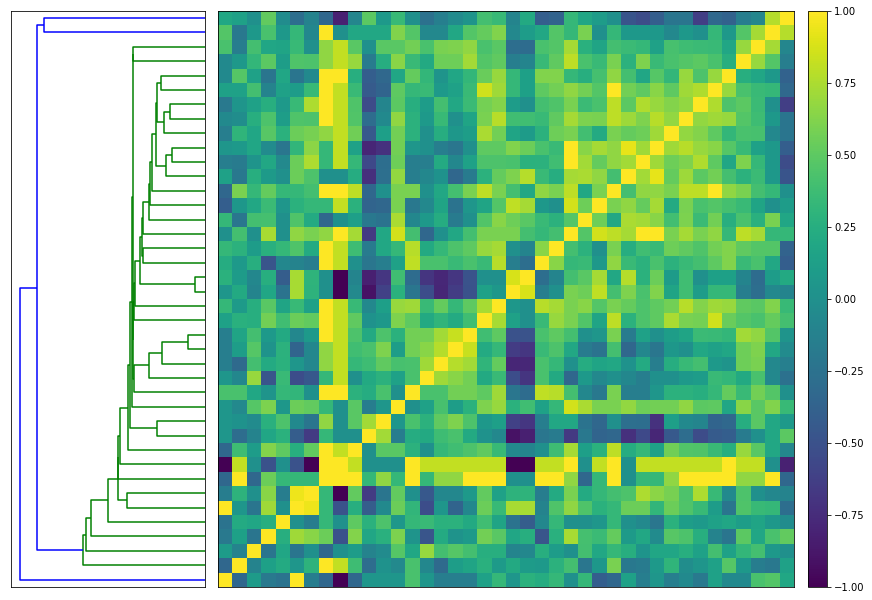

In [32]:
fig = figure(figsize=(13.5,10))
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
D = M.as_matrix()
Y = linkage(D, method='single', metric='correlation')
Z = dendrogram(Y, orientation='left')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='equal', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
colorbar(im, cax=axcolor)

fig.show()

Now,condense this workflow into functions. 

In [13]:
# Aggregate function. See workflow at bottom for what each step does. 
def corr_matrix(df,time_column='date',name='short_name',count='total_people'):
    df1 = df.groupby([name,time_column]).sum()[count].to_frame()
    df1.reset_index(inplace=True)
    df2 = df1.pivot(index=time_column,columns=name,values=count)
    M = df2.corr(method='kendall')
    return M

In [33]:
def corr_matrix_sorted(df,time_column='date',name='short_name',count='total_people'):
    df1 = df.groupby([name,time_column]).sum()[count].to_frame()
    df1.reset_index(inplace=True)
    df2 = df1.pivot(index=time_column,columns=name,values=count)
    M = df2.corr(method='kendall')
    M.values[[np.arange(M.shape[0])]*2] = np.nan
    M.dropna(axis=0,how='all',inplace=True)
    M.dropna(axis=1,how='all',inplace=True)
    M.values[[np.arange(M.shape[0])]*2] = 1
    M.fillna(0,inplace=True)    
    index = dendrogram(linkage(M.as_matrix(), method='single', metric='correlation'), orientation='top')['leaves']
    M = M.reindex(index=M.index[list(reversed(index))],columns=M.columns[list(reversed(index))])
    return M

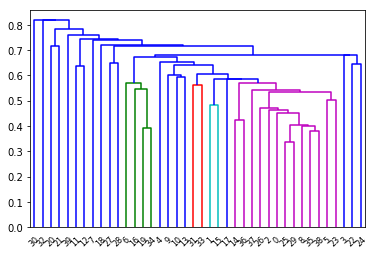

In [34]:
M = corr_matrix_sorted(df,'hour')

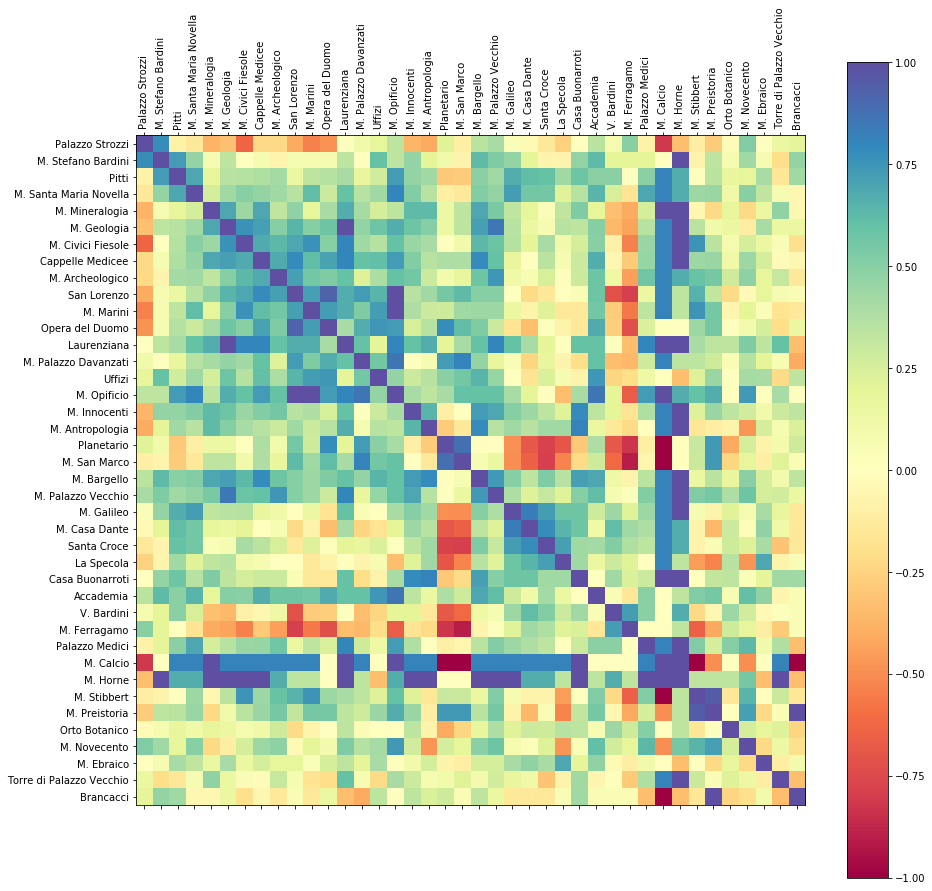

In [55]:
fig = plt.figure(figsize=(15,15))#,dpi=300)
ax = fig.add_subplot(111)
cmap=plt.cm.Spectral

cax = ax.matshow(M,cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+M.index.tolist(),rotation=90)
ax.set_yticklabels(['']+M.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

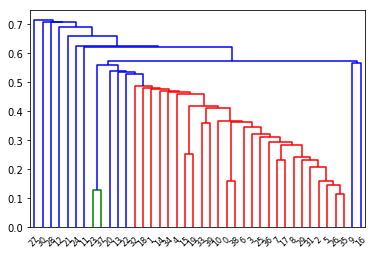

In [36]:
M = corr_matrix_sorted(df,'date')

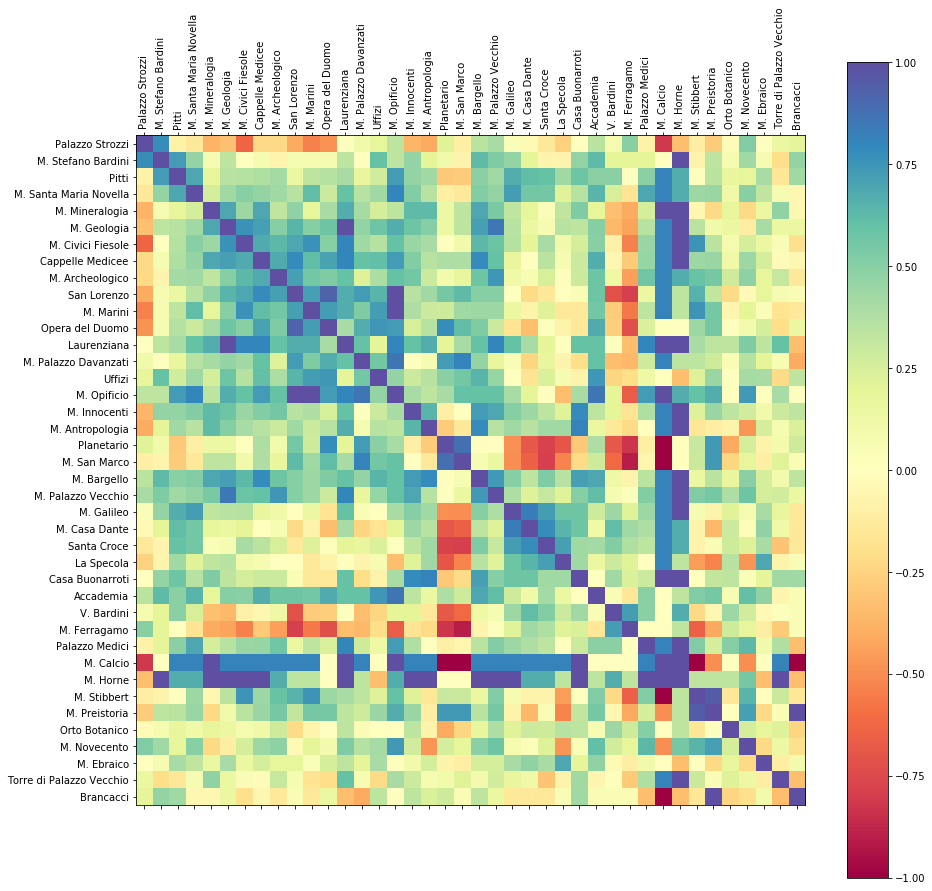

In [56]:
fig = plt.figure(figsize=(15,15))#,dpi=300)
ax = fig.add_subplot(111)
cmap=plt.cm.Spectral

cax = ax.matshow(M,cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+M.index.tolist(),rotation=90)
ax.set_yticklabels(['']+M.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

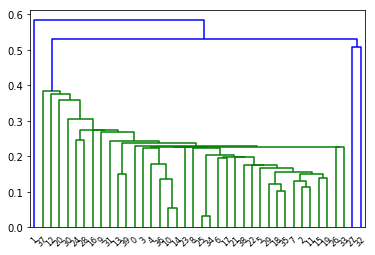

In [38]:
M = corr_matrix_sorted(df,'hour_of_day')

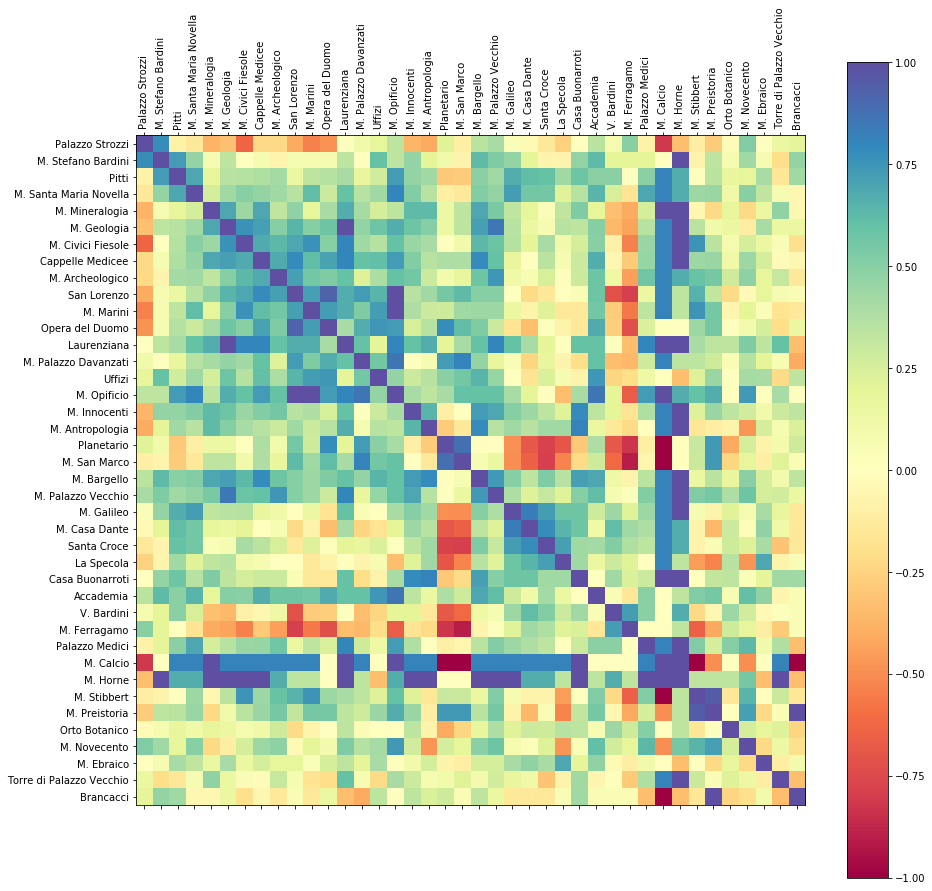

In [57]:
fig = plt.figure(figsize=(15,15))#,dpi=300)
ax = fig.add_subplot(111)
cmap=plt.cm.Spectral

cax = ax.matshow(M,cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+M.index.tolist(),rotation=90)
ax.set_yticklabels(['']+M.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

Sanity checks

In [40]:
df1 = df.groupby(['short_name','hour_of_day']).sum()['total_people'].to_frame()
df1.reset_index(inplace=True)
df2 = df1.pivot(index='hour_of_day',columns='short_name',values='total_people')
df2.head()

short_name,Accademia,Brancacci,Cappelle Medicee,Casa Buonarroti,La Specola,Laurenziana,M. Antropologia,M. Archeologico,M. Bargello,M. Calcio,...,Palazzo Medici,Palazzo Strozzi,Pitti,Planetario,Primo Conti,San Lorenzo,Santa Croce,Torre di Palazzo Vecchio,Uffizi,V. Bardini
hour_of_day,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2854.0,NaN,699.0,NaN,NaN,NaN,NaN,34.0,493.0,NaN,...,143.0,NaN,658.0,NaN,NaN,NaN,NaN,NaN,3830.0,2.0
9,4024.0,NaN,1767.0,23.0,NaN,788.0,NaN,186.0,1149.0,NaN,...,866.0,NaN,2424.0,45.0,NaN,NaN,850.0,435.0,5986.0,36.0
10,4926.0,784.0,2580.0,212.0,69.0,1642.0,79.0,315.0,1747.0,4.0,...,1417.0,429.0,3641.0,76.0,NaN,3221.0,1889.0,1265.0,6111.0,105.0
11,4850.0,554.0,3118.0,250.0,145.0,2291.0,173.0,360.0,2206.0,6.0,...,1954.0,400.0,3878.0,47.0,2.0,3243.0,2320.0,1953.0,5561.0,181.0


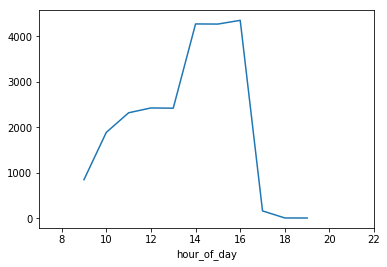

In [41]:
df2['Santa Croce'].plot()

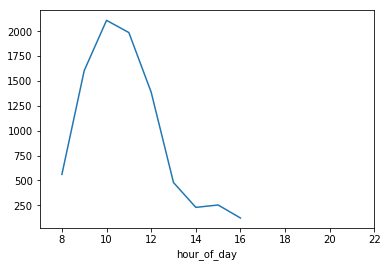

In [42]:
df2['M. San Marco'].plot()

In [43]:
df2[['Santa Croce','M. San Marco']].corr(method='kendall')

short_name,Santa Croce,M. San Marco
short_name,,
Santa Croce,1.000000,-0.785714
M. San Marco,-0.785714,1.000000


In [44]:
df2[['Planetario','M. San Marco']]

short_name,Planetario,M. San Marco
hour_of_day,,
7,NaN,NaN
8,NaN,561.0
9,45.0,1605.0
10,76.0,2111.0
11,47.0,1988.0
12,6.0,1388.0
13,10.0,479.0
14,2.0,229.0
15,NaN,253.0


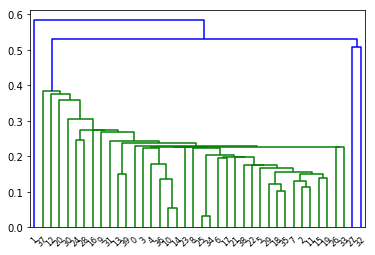

In [45]:
M = corr_matrix_sorted(df,'hour_of_day')

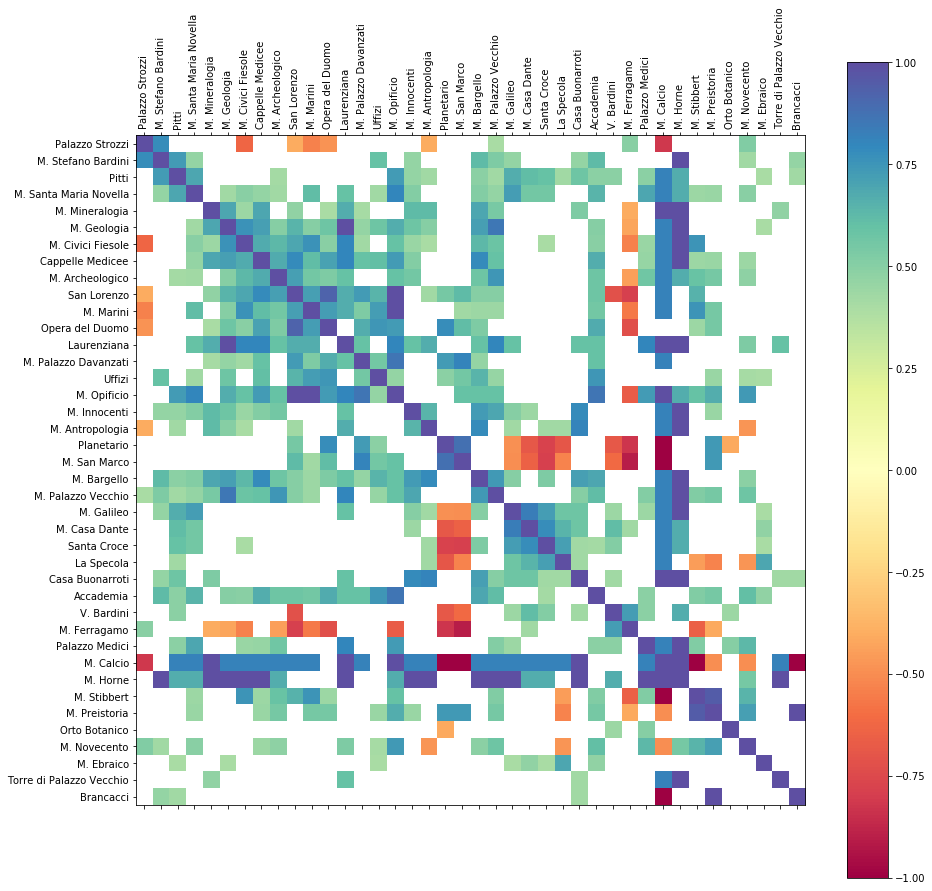

In [53]:
fig = plt.figure(figsize=(15,15))#,dpi=300)
ax = fig.add_subplot(111)
cmap = plt.cm.Spectral

cax = ax.matshow(M[np.abs(M)>.4],cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+M.index.tolist(),rotation=90)
ax.set_yticklabels(['']+M.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [ ]:
dists = pd.DataFrame(squareform(pdist(nodes[['latitude','longitude']])), columns=nodes['short_name'], index=nodes['short_name'])

In [7]:
# Sort rows by lat, sort columns by lon
dists = dists.reindex(index=nodes.sort_values('latitude')['short_name'],columns=nodes.sort_values('longitude')['short_name'])

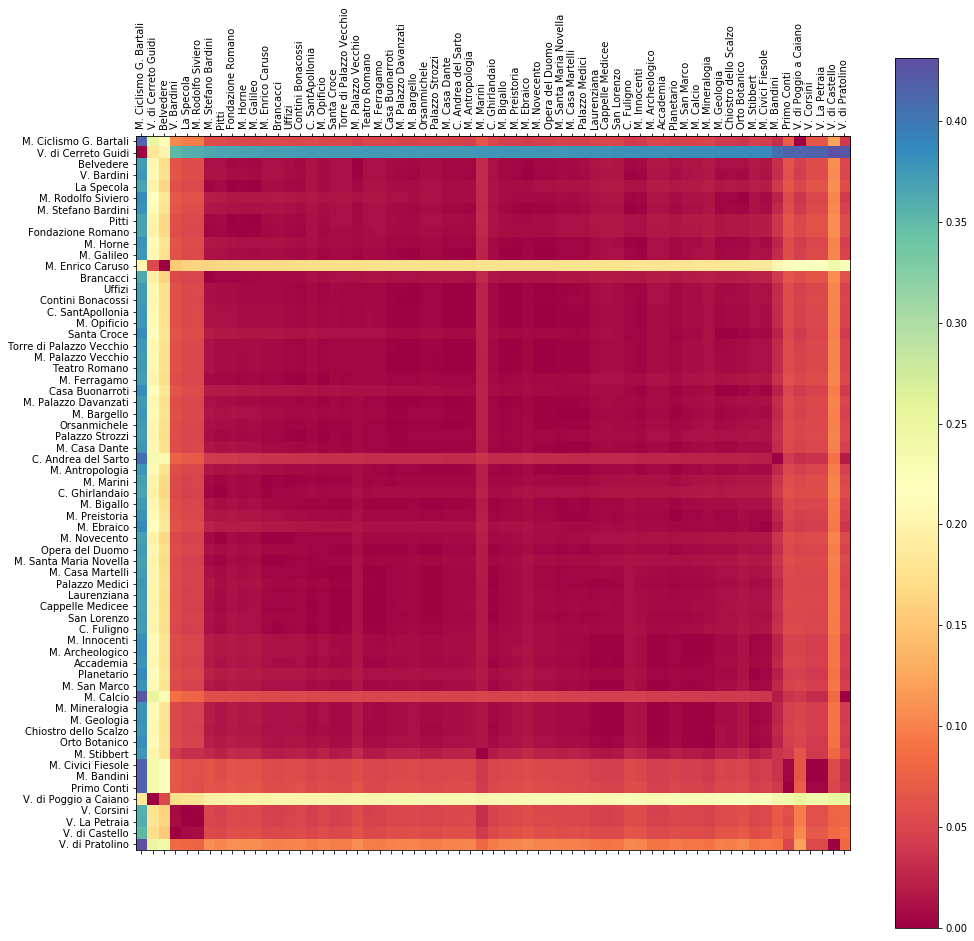

In [8]:
fig = plt.figure(figsize=(16,16))#,dpi=300)
ax = fig.add_subplot(111)
cmap=plt.cm.Spectral

cax = ax.matshow(dists,cmap=cmap)
fig.colorbar(cax)

ax.set_xticklabels(['']+dists.index.tolist(),rotation=90)
ax.set_yticklabels(['']+dists.index.tolist())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()